In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Portfolio analysis using 3 benchmark dataset of the last 25 years

## import data

In [2]:
dfmsci=pd.read_csv('S&P500-action.csv')
dfrex=pd.read_csv('REX-Bond.csv')
dfgold=pd.read_csv('Gold.csv')

# conversion in the useful dataframe

def newdf(df):
    df2=df.iloc[:,[1,3]]
    df2.iloc[:,0]=pd.to_datetime(df2.iloc[:,0],format="%b %d %Y")
    return df2

msci=newdf(dfmsci)
rex=newdf(dfrex)
gold=newdf(dfgold)

# joining the 3 dataframes

dfjoin=pd.concat([msci,rex,gold],axis=1,join='inner')

df=dfjoin.iloc[:,[0,1,3,5]]
df.columns=['Date','S&P500','REX','Gold']

df=df.iloc[::-1,:]

df.head()

/Users/andreapalladino/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Date,S&P500,REX,Gold
1431,1992-05-10,410.09,123.99,338.7
1430,1992-05-17,414.02,124.67,337.9
1429,1992-05-24,415.35,124.79,336.4
1428,1992-05-31,413.48,124.74,338.7
1427,1992-06-07,409.76,125.03,342.9


/Users/andreapalladino/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


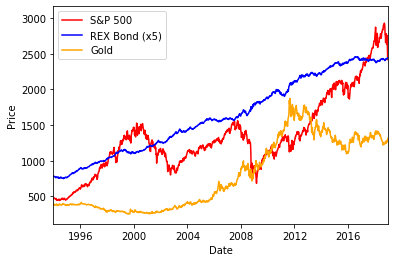

In [3]:
plt.plot(df.iloc[:,0],df.iloc[:,1],label='S&P 500',color='red')
plt.plot(df.iloc[:,0],5*df.iloc[:,2],label='REX Bond (x5)',color='blue')
plt.plot(df.iloc[:,0],df.iloc[:,3],label='Gold',color='orange')
plt.legend()
plt.xlim(['1994','2019'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## analysis without rebalancment

In [4]:
def investment_nobal(capital,start,end,action,bond,gold):
    '''Insert initial capital, starting date and ending date of the investment
    and the riparition between action, bond, gold'''
    dfpartial=df[(df.iloc[:,0]<=end) & (df.iloc[:,0]>=start)]
    dfinv=dfpartial.copy()
    
    totcomp=action+bond+gold
    
    # distribution of the capital
    moneydistr=np.array([action/totcomp*capital,bond/totcomp*capital,gold/totcomp*capital])  
    prices=[dfpartial.iloc[0,1],dfpartial.iloc[0,2],dfpartial.iloc[0,3]]
    quote=moneydistr/prices        
 
    dfinv['S&P500']=dfpartial.iloc[:,1]*quote[0]
    dfinv['REX']=dfpartial.iloc[:,2]*quote[1]
    dfinv['Gold']=dfpartial.iloc[:,3]*quote[2]
    dfinv['Total']=dfinv['S&P500']+dfinv['REX']+dfinv['Gold']
    dfinv['Frac-action']=np.array(dfinv['S&P500'])/np.array(dfinv['Total'])
        
    result=dfinv
    
    # annual return
    period=(result.iloc[-1,0]-result.iloc[0,0]).days/365
    totreturn=1+(result.iloc[-1,4]-result.iloc[0,4])/result.iloc[0,4]
    annreturn=round((totreturn**(1/period)-1)*100,1)
    perctotreturn=round((totreturn-1)*100,1)
    print('total return: x'+str(round(totreturn,2)))
    print('annual return: '+str(annreturn)+'%')

    # volatility
    weekint=np.array(result.iloc[:,4].pct_change())
    volatility=round(np.std(weekint[1:])*np.sqrt(52)*100,1)
    print('volatility: '+str(volatility)+'%')

    # sharp ratio
    sharpratio=round(annreturn/volatility,2)
    print('sharp ratio: '+str(sharpratio))
        
    return dfinv,annreturn,volatility,sharpratio

In [5]:
investment_nobal(100000,'1995','2005',0.2,0.6,0)[0].head()

total return: x2.15
annual return: 8.0%
volatility: 6.2%
sharp ratio: 1.29


,Date,S&P500,REX,Gold,Total,Frac-action
1293,1995-01-01,25000.000000,75000.000000,0.0,100000.000000,0.250000
1292,1995-01-08,25287.075627,75704.479769,0.0,100991.555396,0.250388
1291,1995-01-15,25222.497178,75817.787704,0.0,101040.284882,0.249628
1290,1995-01-22,25526.938439,76330.136626,0.0,101857.075065,0.250615
1289,1995-01-29,25975.188851,76300.578035,0.0,102275.766886,0.253972


total return: x4.06
annual return: 5.8%
volatility: 7.9%
sharp ratio: 0.73


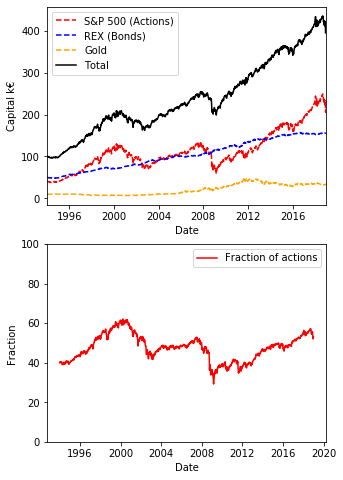

In [6]:
start=1994
end=2019
composition=[0.4,0.5,0.1]   # actions, bonds, gold

result=investment_nobal(100000,str(start),str(end),composition[0],composition[1],composition[2])[0]

plt.figure(figsize=(5,8))
plt.subplot(2,1,1)
plt.plot(result.iloc[:,0],result.iloc[:,1]*10**-3,label='S&P 500 (Actions)',color='red',linestyle='--')
plt.plot(result.iloc[:,0],result.iloc[:,2]*10**-3,label='REX (Bonds)',color='blue',linestyle='--')
plt.plot(result.iloc[:,0],result.iloc[:,3]*10**-3,label='Gold',color='orange',linestyle='--')
plt.plot(result.iloc[:,0],result.iloc[:,4]*10**-3,label='Total',color='black')
plt.xlim([str(start),str(end)])
plt.legend()
plt.xlabel('Date')
plt.ylabel('Capital k€')
plt.subplot(2,1,2)
plt.plot(result.iloc[:,0],result.iloc[:,5]*100,label='Fraction of actions',color='red')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Fraction')
plt.ylim(0,100)
plt.savefig('Nonbalanced.png',dpi=300)
plt.show()

## portfolio with rebalancment

In [7]:
def investment_bal(capital,start,end,action,bond,gold,verbose=1):
    '''Insert initial capital, starting date and ending date of the investment
    and the riparition between action, bond, gold'''
    dfpartial=df[(df.iloc[:,0]<=end) & (df.iloc[:,0]>=start)]
    dfinv=dfpartial.copy()
    
    totcomp=action+bond+gold
    tempo=int(len(dfpartial)/52)
    
    # updating the portfolio
    for i in range(tempo):
        # yearly rebalancment of the portfolio
        if i != tempo-1:
            # distribution of the capital
            moneydistr=np.array([action/totcomp*capital,bond/totcomp*capital,gold/totcomp*capital])  
            prices=[dfpartial.iloc[0+52*i,1],dfpartial.iloc[0+52*i,2],dfpartial.iloc[0+52*i,3]]
            quote=moneydistr/prices        
 
            # updating the data frame
            dfinv.iloc[52*i:52*(i+1),1]=dfpartial.iloc[52*i:52*(i+1),1]*quote[0]
            dfinv.iloc[52*i:52*(i+1),2]=dfpartial.iloc[52*i:52*(i+1),2]*quote[1]
            dfinv.iloc[52*i:52*(i+1),3]=dfpartial.iloc[52*i:52*(i+1),3]*quote[2]
            dfinv['Total']=dfinv['S&P500']+dfinv['REX']+dfinv['Gold']   
            dfinv['Frac-action']=np.array(dfinv['S&P500'])/np.array(dfinv['Total'])
        
            capital=dfinv.iloc[52*(i+1)-1,4]
        
        else:
            # distribution of the capital
            moneydistr=np.array([action/totcomp*capital,bond/totcomp*capital,gold/totcomp*capital])  
            prices=[dfpartial.iloc[0+52*i,1],dfpartial.iloc[0+52*i,2],dfpartial.iloc[0+52*i,3]]
            quote=moneydistr/prices        
 
            # updating the data frame
            dfinv.iloc[52*i:,1]=dfpartial.iloc[52*i:,1]*quote[0]
            dfinv.iloc[52*i:,2]=dfpartial.iloc[52*i:,2]*quote[1]
            dfinv.iloc[52*i:,3]=dfpartial.iloc[52*i:,3]*quote[2]
            dfinv['Total']=dfinv['S&P500']+dfinv['REX']+dfinv['Gold']
            dfinv['Frac-action']=np.array(dfinv['S&P500'])/np.array(dfinv['Total'])
        
    result=dfinv
    
    # annual return
    period=(result.iloc[-1,0]-result.iloc[0,0]).days/365
    totreturn=1+(result.iloc[-1,4]-result.iloc[0,4])/result.iloc[0,4]
    annreturn=round((totreturn**(1/period)-1)*100,1)
    perctotreturn=round((totreturn-1)*100,1)

    # volatility
    weekint=np.array(result.iloc[:,4].pct_change())
    volatility=round(np.std(weekint[1:])*np.sqrt(52)*100,1)
    

    # sharp ratio
    sharpratio=round(annreturn/volatility,2)
    
    if verbose==1:
        print('total return: x'+str(round(totreturn,2)))
        print('annual return: '+str(annreturn)+'%')
        print('volatility: '+str(volatility)+'%')
        print('sharp ratio: '+str(sharpratio))
        
    return dfinv,annreturn,volatility,sharpratio

total return: x4.72
annual return: 6.4%
volatility: 8.0%
sharp ratio: 0.8


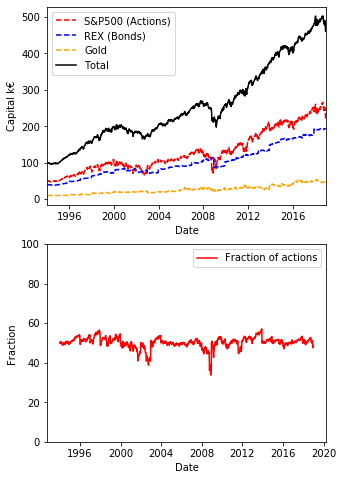

In [8]:
start=1994
end=2019
composition=[0.5,0.4,0.1]   # actions, bonds, gold

result=investment_bal(100000,str(start),str(end),composition[0],composition[1],composition[2])[0]

plt.figure(figsize=(5,8))
plt.subplot(2,1,1)
plt.plot(result.iloc[:,0],result.iloc[:,1]*10**-3,label='S&P500 (Actions)',color='red',linestyle='--')
plt.plot(result.iloc[:,0],result.iloc[:,2]*10**-3,label='REX (Bonds)',color='blue',linestyle='--')
plt.plot(result.iloc[:,0],result.iloc[:,3]*10**-3,label='Gold',color='orange',linestyle='--')
plt.plot(result.iloc[:,0],result.iloc[:,4]*10**-3,label='Total',color='black')
plt.xlim([str(start),str(end)])
plt.legend()
plt.xlabel('Date')
plt.ylabel('Capital k€')
plt.subplot(2,1,2)
plt.plot(result.iloc[:,0],result.iloc[:,5]*100,label='Fraction of actions',color='red')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Fraction')
plt.ylim(0,100)
plt.savefig('balanced.png',dpi=300)
plt.show()

## risk analysis

In [9]:
start=1994
end=2019

investment_bal_vec=np.vectorize(investment_bal)

actgrid=np.arange(0,1.05,0.05)
resultgrid=investment_bal_vec(100000,str(start),str(end),actgrid,1-actgrid,0,verbose=0)

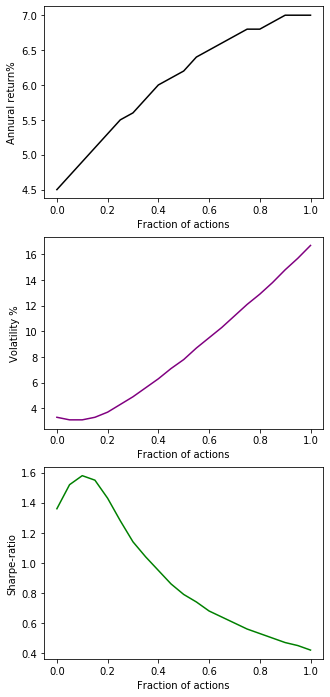

In [10]:
sharperatio=resultgrid[3]
annrend=resultgrid[1]
volat=resultgrid[2]

plt.figure(figsize=(5,12))
plt.subplot(3,1,1)
plt.plot(actgrid,annrend,color='black')
plt.xlabel('Fraction of actions')
plt.ylabel('Annural return%')
plt.subplot(3,1,2)
plt.plot(actgrid,volat,color='purple')
plt.xlabel('Fraction of actions')
plt.ylabel('Volatility %')
plt.subplot(3,1,3)
plt.plot(actgrid,sharperatio,color='green')
plt.xlabel('Fraction of actions')
plt.ylabel('Sharpe-ratio')
plt.savefig('finres.png',dpi=300)
plt.show()

## searching for the best return

In [11]:
#capitale=100000
#start=2012
#end=2019

#investment_bal_vec(100000,str(start),str(end),actgrid,1-actgrid,0,verbose=0)

#x = np.arange(0,1.1,0.1)
#y = np.arange(0,1.1,0.1)
#xx, yy = np.meshgrid(x, y, sparse=True)
#z = investment_bal_vec(capitale,str(start),str(end),xx,yy,1-xx-yy,verbose=0)[1]    # FORMULA SBAGLIATA !!!

In [12]:
#plt.contourf(x,y,z)
#plt.colorbar()
#plt.xlabel('Fraction of actions')
#plt.ylabel('Fraction of bonds')
#plt.show()

## interactive plot, using bokeh

In [13]:
# interactivity section

import ipywidgets as widgets
from ipywidgets import interact
from bokeh.io import push_notebook, show, output_notebook, output_file
from bokeh.plotting import figure
from bokeh.layouts import row
#from bokeh.models import widgets
output_notebook()

Loading BokehJS ...

In [14]:
start=1994
end=2019
composition=[0.5,0.4,0.1]   # actions, bonds, gold

result=investment_bal(100000,str(start),str(end),composition[0],composition[1],composition[2])[0]

x=result.iloc[:,0]
y1=result.iloc[:,1]/1000
y2=result.iloc[:,2]/1000
y3=result.iloc[:,3]/1000
y4=result.iloc[:,4]/1000

#creating interactive bokeh figure
p = figure(x_axis_type="datetime",x_axis_label='Data',y_axis_label='Capital k€', plot_height=300, plot_width=600,y_range=(0,700),
           background_fill_color='#efefef')#,title="simple line example")
r1 = p.line(x, y1, color='red', line_width=1.5, alpha=0.8,legend='S&P500 (Action)')
r2 = p.line(x, y2, color='blue', line_width=1.5, alpha=0.8,legend='REX (Bond)')
r3 = p.line(x, y3, color='orange', line_width=1.5, alpha=0.8,legend='Gold')
r4 = p.line(x, y4, color='black', line_width=1.5, alpha=0.8,legend='Total')

p.legend.location = "top_left"

show(p, notebook_handle=True)

#definition of the callback function
def update(capital,start,end,action,bond,gold):
    newresult=investment_bal(capital,str(start),str(end),action,bond,gold)[0]
    
    #updating xvalues
    r1.data_source.data={'x':newresult.iloc[:,0],'y':newresult.iloc[:,1]/1000}
    r2.data_source.data={'x':newresult.iloc[:,0],'y':newresult.iloc[:,2]/1000}
    r3.data_source.data={'x':newresult.iloc[:,0],'y':newresult.iloc[:,3]/1000}
    r4.data_source.data={'x':newresult.iloc[:,0],'y':newresult.iloc[:,4]/1000}
    
    #updating xvalues
    #r1.data_source.data['x'] = newresult.iloc[:,0]
    
    #updating yvalues
    #r1.data_source.data['y'] = newresult.iloc[:,1]/1000

    push_notebook()
    

total return: x4.72
annual return: 6.4%
volatility: 8.0%
sharp ratio: 0.8


In [15]:
#build widgets
wcap=widgets.IntSlider(min=10000,max=100000,step=10000,value=100000)
wstart=widgets.IntSlider(min=1994,max=2018,step=1,value=1994)
wend=widgets.IntSlider(min=1995,max=2019,step=1,value=2019)
waction=widgets.IntSlider(min=0,max=100,step=5,value=35)
wbond=widgets.IntSlider(min=0,max=100,step=5,value=35)
wgold=widgets.IntSlider(min=0,max=100,step=5,value=30)

#build interaction
interact(update, capital=wcap, start=wstart, end=wend, action=waction, bond=wbond,gold=wgold)
show(p, notebook_handle=True)
#output_file('int-output.html')

interactive(children=(IntSlider(value=100000, description='capital', max=100000, min=10000, step=10000), IntSl…